# [Machine Learning](https://github.com/rezaAdinepour/Machine-Learning-Homework/) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)

# Problem 1: Table Preprocessing

In machine learning, preparing data for model training typically involves several
preprocessing stages. These steps, collectively referred to as preprocessing, include tasks
such as data cleaning and feature engineering. While some techniques are commonly applied
across various datasets, others are employed for specific cases. This exercise focuses on the
essential preprocessing steps commonly undertaken before model training.

* Load CSV file of the dataset `Dataset_01.csv` and show 10 random items.
* Visualize the data to find more about the characteristics of each feature.
* Visualize the data to find the relationship between different features specially features with the target value.
* Perform necessary data cleanings (which includes handling missing values, duplicates, outliers, inconsistencies, incorrect values, etc.).
* Perform the necessary feature engineering and normalize the data.
* For each step, describe your approach and the results.

## import libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## read datasets

In [127]:
df = pd.read_csv("Dataset_01.csv")
print(df.shape)
df

(48842, 16)


,Unnamed: 0,index,age,job_category,edu,edu_level,marriage,job,rel,race,sex,gain,loss,hours-per-week,nationality,salary
0,0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,48838,48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,48839,48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,48840,48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## print random items without pandas

In [128]:
headers = df.columns.tolist()
N = 10
num = np.zeros(N)
for i in range(len(num)):
    num[i] = np.random.randint(1, len(num) + 1)


for i in num:
    print(headers[int(i)])
    print(df[headers[int(i)]])
    print('-'*50)

race
0        Black
1        White
2        White
3        Black
4        White
         ...  
48837    White
48838    White
48839    White
48840    White
48841    White
Name: race, Length: 48842, dtype: object
--------------------------------------------------
job
0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: job, Length: 48842, dtype: object
--------------------------------------------------
age
0        25
1        38
2        28
3        44
4        18
         ..
48837    27
48838    40
48839    58
48840    22
48841    52
Name: age, Length: 48842, dtype: int64
--------------------------------------------------
sex
0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
4883

## print random items with pandas

In [129]:
random_items = df.sample(n=10)
print(random_items)

       Unnamed: 0  index  age job_category           edu  edu_level  \
1739         1739   1739   39      Private  Some-college         10   
12290       12290  12290   27      Private          11th          7   
23723       23723  23723   24      Private    Assoc-acdm         12   
25223       25223  25223   30      Private       HS-grad          9   
9159         9159   9159   59      Private       HS-grad          9   
455           455    455   24      Private  Some-college         10   
15103       15103  15103   44      Private    Assoc-acdm         12   
7322         7322   7322   35      Private    Assoc-acdm         12   
40738       40738  40738   39      Private     Bachelors         13   
27804       27804  27804   48      Private          11th          7   

                 marriage                job            rel   race     sex  \
1739   Married-civ-spouse              Sales        Husband  White    Male   
12290       Never-married      Other-service      Own-child  O

## visualize the data

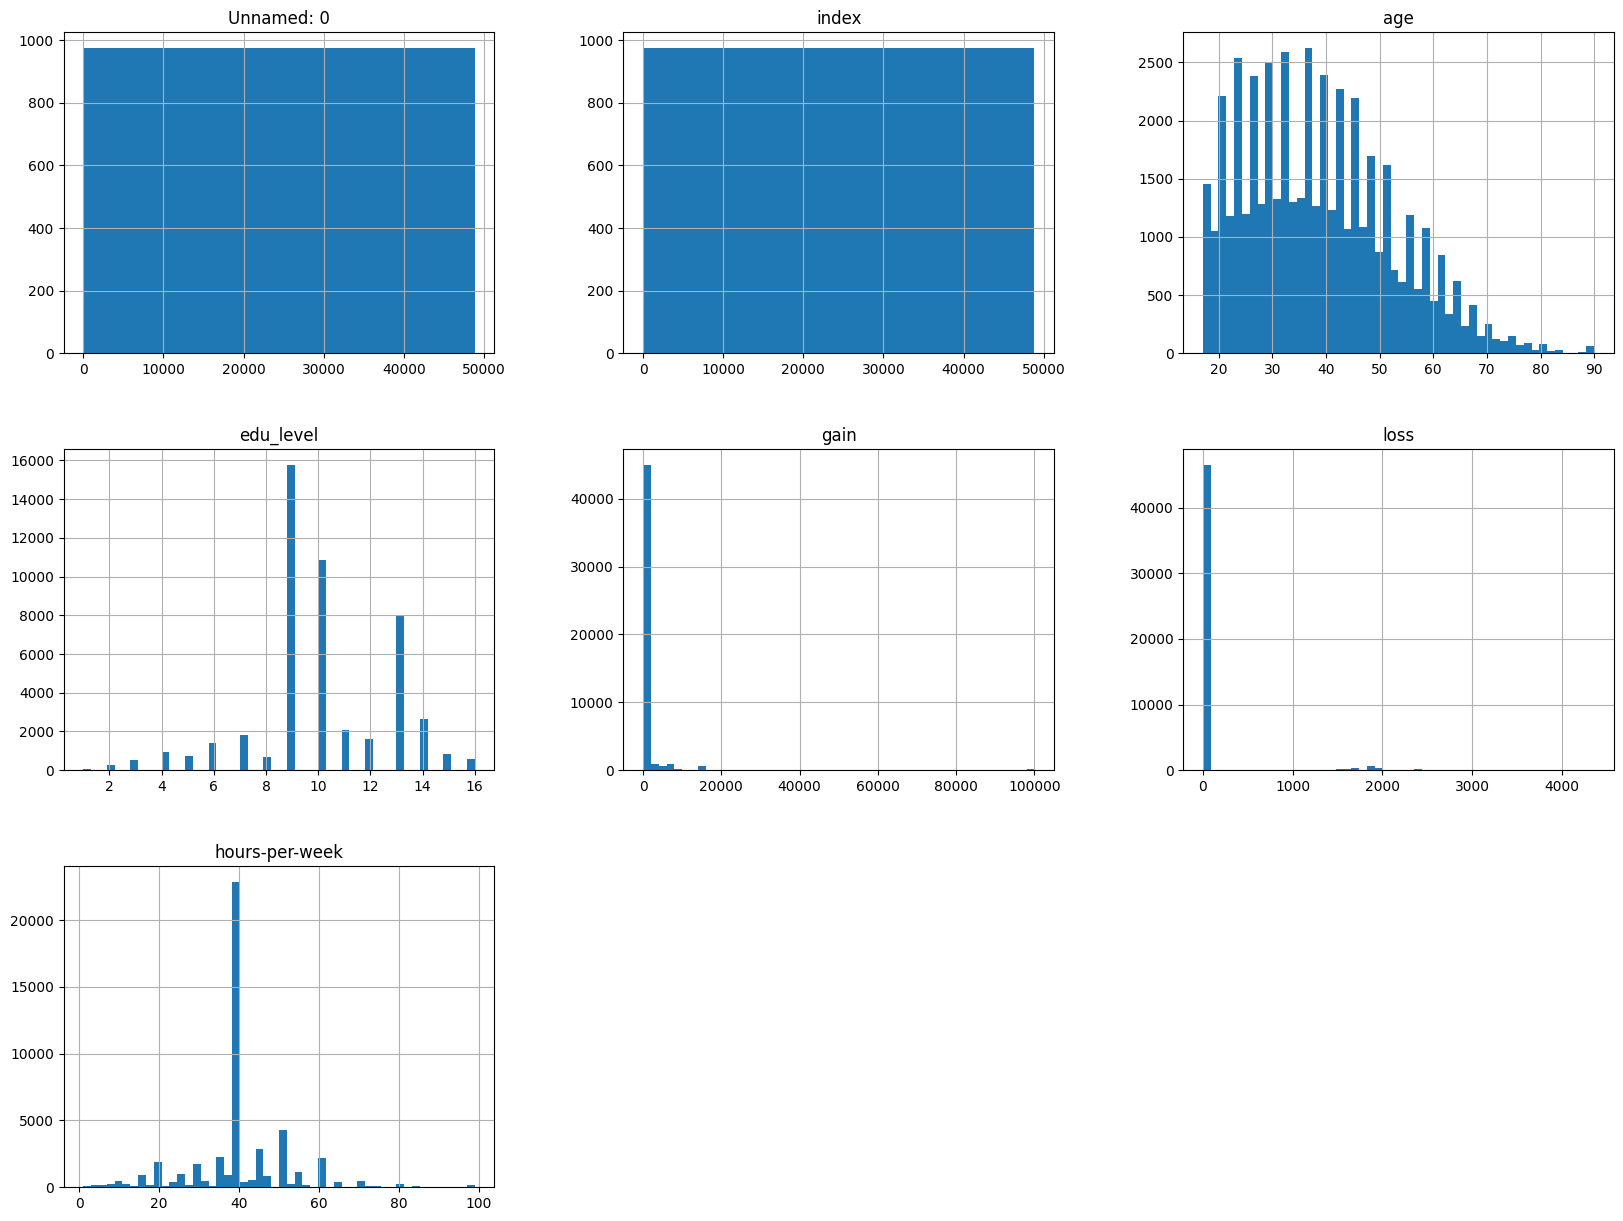

In [130]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

['Unnamed: 0', 'index', 'age', 'job_category', 'edu', 'edu_level', 'marriage', 'job', 'rel', 'race', 'sex', 'gain', 'loss', 'hours-per-week', 'nationality', 'salary']


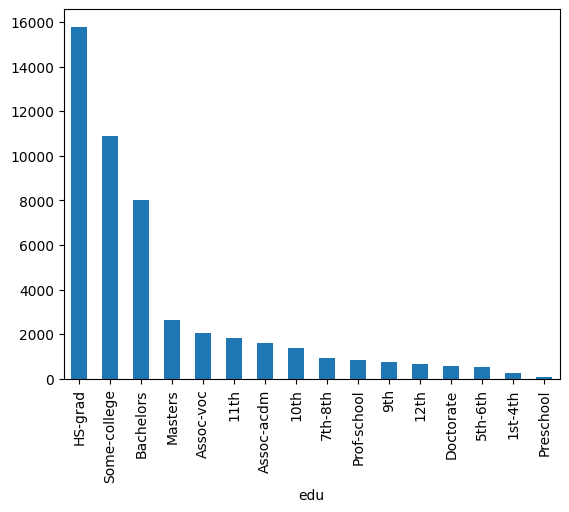

In [131]:
print(headers)

df[headers[4]].value_counts().plot(kind='bar')
plt.show()

array([[<Axes: xlabel='edu_level', ylabel='edu_level'>]], dtype=object)

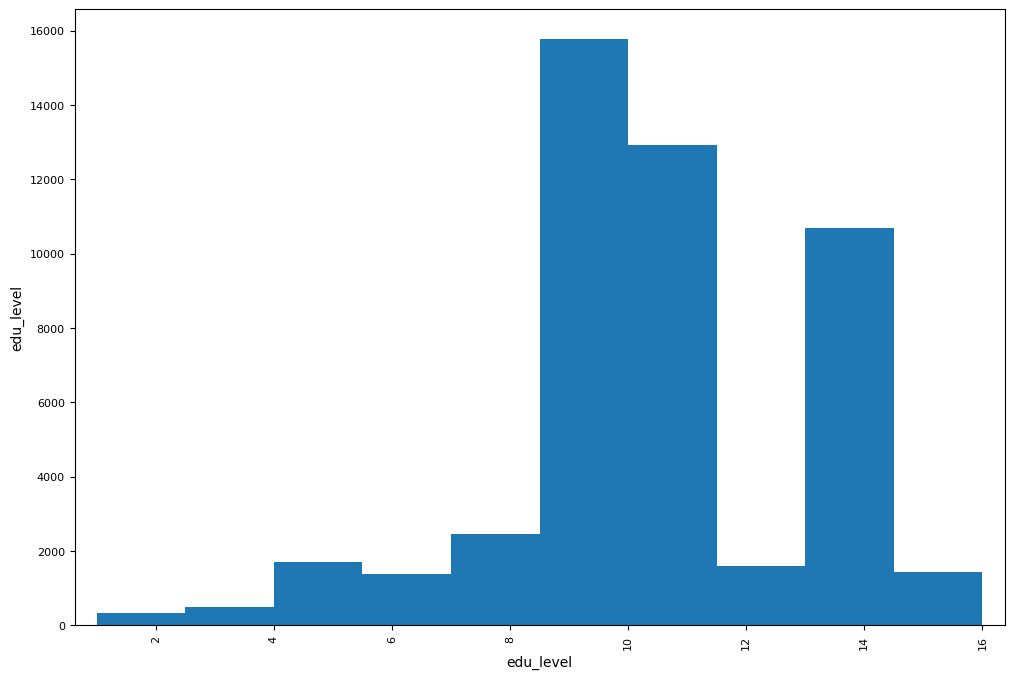

In [133]:
from pandas.plotting import scatter_matrix

features = [headers[3], headers[4], headers[5], headers[6]]
scatter_matrix(df[features], figsize=(12, 8))

In [134]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()
print(corr_matrix)
print(corr_matrix["index"].sort_values(ascending=False))

                Unnamed: 0     index       age  edu_level      gain      loss  \
Unnamed: 0        1.000000  1.000000 -0.003973   0.001213 -0.000532 -0.001139   
index             1.000000  1.000000 -0.003973   0.001213 -0.000532 -0.001139   
age              -0.003973 -0.003973  1.000000   0.030940  0.077229  0.056944   
edu_level         0.001213  0.001213  0.030940   1.000000  0.125146  0.080972   
gain             -0.000532 -0.000532  0.077229   0.125146  1.000000 -0.031441   
loss             -0.001139 -0.001139  0.056944   0.080972 -0.031441  1.000000   
hours-per-week    0.001497  0.001497  0.071558   0.143689  0.082157  0.054467   

                hours-per-week  
Unnamed: 0            0.001497  
index                 0.001497  
age                   0.071558  
edu_level             0.143689  
gain                  0.082157  
loss                  0.054467  
hours-per-week        1.000000  
Unnamed: 0        1.000000
index             1.000000
hours-per-week    0.001497
edu_le

In [135]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

df.drop_duplicates(inplace=True)


Q1 = df.select_dtypes(include=['int64', 'float64']).quantile(0.25)
Q3 = df.select_dtypes(include=['int64', 'float64']).quantile(0.75)
IQR = Q3 - Q1

df[numeric_columns] = df[numeric_columns][~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [137]:
from sklearn.preprocessing import MinMaxScaler

df = pd.get_dummies(df)
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

df

,Unnamed: 0,index,age,edu_level,gain,loss,hours-per-week,job_category_?,job_category_Federal-gov,job_category_Local-gov,...,nationality_Scotland,nationality_South,nationality_Taiwan,nationality_Thailand,nationality_Trinadad&Tobago,nationality_United-States,nationality_Vietnam,nationality_Yugoslavia,salary_<=50K,salary_>50K
0,0.000000,0.000000,0.131148,0.181818,0.0,0.0,0.368421,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000020,0.000020,0.344262,0.363636,0.0,0.0,0.894737,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.000041,0.000041,0.180328,0.636364,0.0,0.0,0.368421,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.999959,0.999959,0.163934,0.636364,0.0,0.0,0.263158,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48838,0.999980,0.999980,0.377049,0.363636,0.0,0.0,0.368421,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48839,1.000000,1.000000,0.672131,0.363636,0.0,0.0,0.368421,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
